In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from subprocess import check_output
print check_output(["ls", "data/train"]).decode("utf8")

subj10_series1_data.csv
subj10_series1_events.csv
subj10_series2_data.csv
subj10_series2_events.csv
subj10_series3_data.csv
subj10_series3_events.csv
subj10_series4_data.csv
subj10_series4_events.csv
subj10_series5_data.csv
subj10_series5_events.csv
subj10_series6_data.csv
subj10_series6_events.csv
subj10_series7_data.csv
subj10_series7_events.csv
subj10_series8_data.csv
subj10_series8_events.csv
subj11_series1_data.csv
subj11_series1_events.csv
subj11_series2_data.csv
subj11_series2_events.csv
subj11_series3_data.csv
subj11_series3_events.csv
subj11_series4_data.csv
subj11_series4_events.csv
subj11_series5_data.csv
subj11_series5_events.csv
subj11_series6_data.csv
subj11_series6_events.csv
subj11_series7_data.csv
subj11_series7_events.csv
subj11_series8_data.csv
subj11_series8_events.csv
subj12_series1_data.csv
subj12_series1_events.csv
subj12_series2_data.csv
subj12_series2_events.csv
subj12_series3_data.csv
subj12_series3_events.csv
subj12_series4_data.csv
subj12_series4_events.csv


In [33]:
eeg = pd.read_csv('data/train/subj10_series1_data.csv')
print eeg.shape
eeg.head()

(262387, 33)


,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,subj10_series1_0,-304,-156,-411,-640,-505,-603,-451,104,-344,...,-197,-597,-242,-472,-56,-338,-335,-518,-371,-177
1,subj10_series1_1,-300,-151,-376,-670,-509,-622,-422,60,-374,...,-203,-611,-224,-471,-53,-310,-326,-511,-396,-189
2,subj10_series1_2,-286,-227,-400,-724,-525,-631,-469,70,-378,...,-176,-608,-234,-475,-78,-282,-289,-505,-424,-193
3,subj10_series1_3,-281,-272,-447,-702,-540,-640,-492,71,-386,...,-154,-605,-246,-488,-73,-304,-337,-539,-412,-192
4,subj10_series1_4,-294,-194,-432,-693,-503,-609,-500,109,-385,...,-146,-602,-226,-448,-25,-342,-333,-549,-400,-157


In [4]:
evt = pd.read_csv('data/train/subj10_series1_events.csv')
print evt.shape
evt.head()

(262387, 7)


,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,subj10_series1_0,0,0,0,0,0,0
1,subj10_series1_1,0,0,0,0,0,0
2,subj10_series1_2,0,0,0,0,0,0
3,subj10_series1_3,0,0,0,0,0,0
4,subj10_series1_4,0,0,0,0,0,0


In [5]:
eeg.drop("id", axis = 1, inplace=True)
evt.drop("id", axis = 1, inplace=True)

In [6]:
eeg.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
count,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,...,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000
mean,-86.238510,-208.771627,-122.016967,-427.069051,-351.648542,-206.431222,-323.689005,-54.680392,-236.035692,-304.621666,...,-204.783690,-369.480565,-125.396853,-243.953611,-119.396578,-330.901874,-218.154139,-640.792612,-353.016826,-467.407311
std,269.620152,254.806070,278.971481,161.268718,146.001852,270.501995,168.565288,190.552756,71.387063,194.954165,...,176.353497,186.829252,164.629680,140.499600,178.106856,171.757050,170.681583,185.227185,159.828020,209.278635
min,-1086.000000,-1224.000000,-1495.000000,-989.000000,-758.000000,-1448.000000,-3503.000000,-1197.000000,-498.000000,-914.000000,...,-1097.000000,-1442.000000,-972.000000,-1028.000000,-1195.000000,-1661.000000,-1342.000000,-1801.000000,-1614.000000,-1774.000000
25%,-250.000000,-358.000000,-281.000000,-537.000000,-458.000000,-377.000000,-435.000000,-168.000000,-289.000000,-433.000000,...,-321.000000,-487.000000,-241.000000,-339.000000,-234.000000,-442.000000,-333.000000,-765.000000,-457.000000,-610.000000
50%,-84.000000,-203.000000,-115.000000,-435.000000,-355.000000,-233.000000,-322.000000,-42.000000,-229.000000,-308.000000,...,-203.000000,-367.000000,-130.000000,-244.000000,-117.000000,-330.000000,-221.000000,-647.000000,-355.000000,-468.000000
75%,67.000000,-59.000000,37.000000,-322.000000,-257.000000,-49.000000,-210.000000,76.000000,-183.000000,-186.000000,...,-87.000000,-249.000000,-13.000000,-151.000000,-2.000000,-217.000000,-108.000000,-522.000000,-250.000000,-325.000000
max,2414.000000,2307.000000,1921.000000,498.000000,161.000000,824.000000,1888.000000,995.000000,-4.000000,284.000000,...,864.000000,360.000000,562.000000,316.000000,860.000000,454.000000,534.000000,143.000000,411.000000,409.000000


In [7]:
evt.describe()

,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
count,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000
mean,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437
std,0.138055,0.138055,0.138055,0.138055,0.138055,0.138055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print eeg.isnull().any().any()
print evt.isnull().any().any()

False
False


In [9]:
data = pd.concat( [eeg, evt], axis=1 )
print data.shape

(262387, 38)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262387 entries, 0 to 262386
Data columns (total 38 columns):
Fp1                   262387 non-null int64
Fp2                   262387 non-null int64
F7                    262387 non-null int64
F3                    262387 non-null int64
Fz                    262387 non-null int64
F4                    262387 non-null int64
F8                    262387 non-null int64
FC5                   262387 non-null int64
FC1                   262387 non-null int64
FC2                   262387 non-null int64
FC6                   262387 non-null int64
T7                    262387 non-null int64
C3                    262387 non-null int64
Cz                    262387 non-null int64
C4                    262387 non-null int64
T8                    262387 non-null int64
TP9                   262387 non-null int64
CP5                   262387 non-null int64
CP1                   262387 non-null int64
CP2                   262387 non-null int64
CP6      

In [11]:
c = data.corr().abs()

#Set sup diag and diag to zero to avoid double display of correlations
rm = np.argwhere(np.tri( *c.as_matrix().shape, k = -1 ) == 0)
rm = map(tuple, rm)
for r in rm:
    c.iloc[r] = 0

s = c.unstack()
so = s.sort_values(kind="quicksort")
so[::-1].head(20)

CP1   CP2    0.850585
F8    FC6    0.799299
PO9   O1     0.785094
C4    CP2    0.782743
Oz    O2     0.776047
CP2   Pz     0.759745
C4    CP6    0.756661
P4    O2     0.749415
CP2   P4     0.747625
O1    O2     0.745516
TP10  PO9    0.738783
P8    O2     0.733463
C4    T8     0.731208
P7    PO9    0.730533
TP9   PO9    0.716483
PO9   O2     0.714060
F8    T8     0.713363
TP9   P7     0.703687
CP1   Pz     0.700355
CP2   CP6    0.694380
dtype: float64

In [12]:
c = data.corrwith( data.loc[:,'HandStart'] ).abs()
so = c.sort_values(kind="quicksort")
so[::-1].head(20)

HandStart    1.000000
O2           0.110100
O1           0.105554
P4           0.098533
C4           0.093259
CP6          0.092107
T8           0.091844
CP2          0.091479
PO9          0.091072
Oz           0.087616
P3           0.085830
P8           0.084870
P7           0.072931
Pz           0.071843
CP1          0.065124
FC6          0.064961
TP10         0.062670
F8           0.062150
PO10         0.053823
TP9          0.051868
dtype: float64

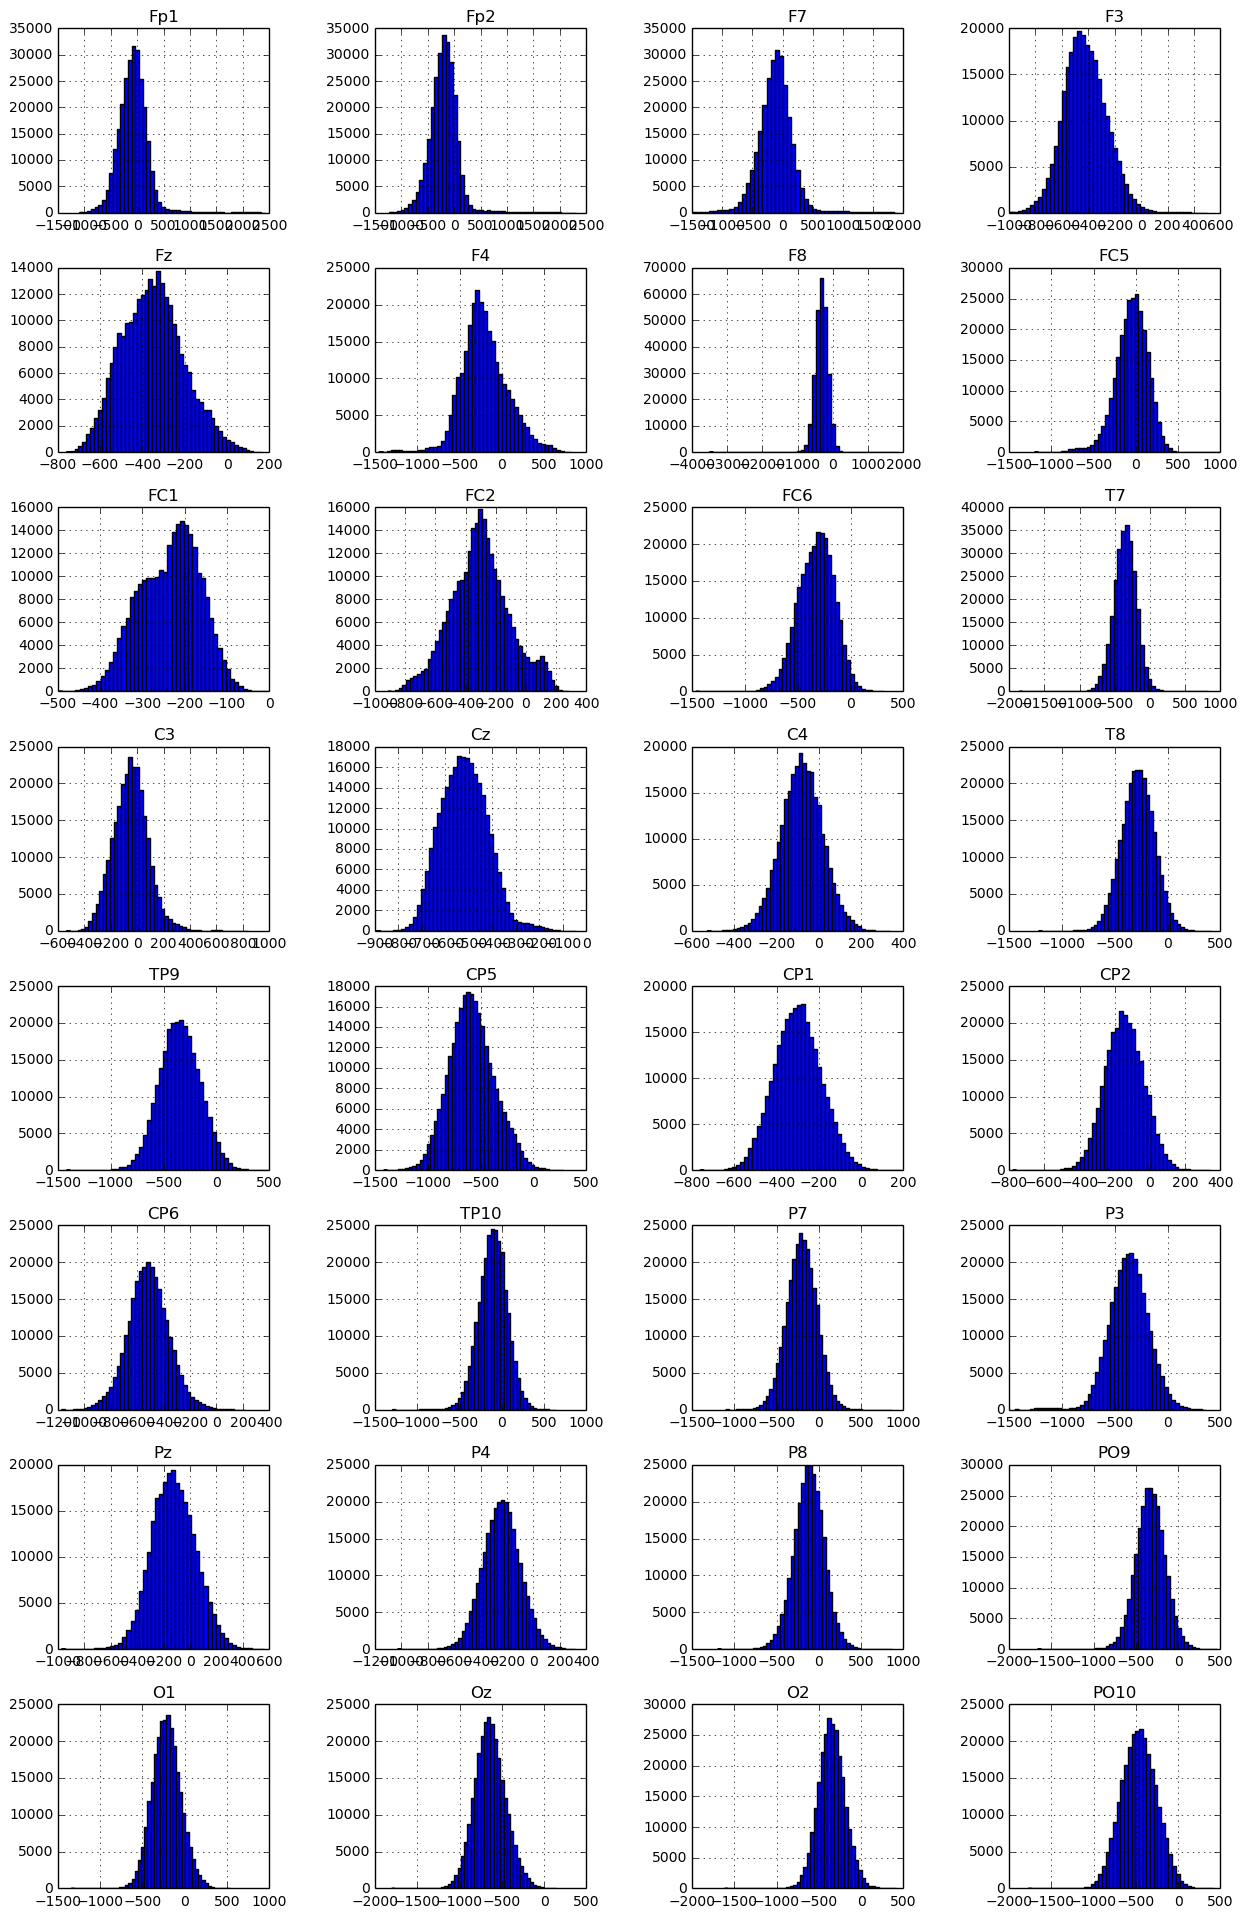

In [13]:
import math

n_cols = 4
n_rows = int( math.ceil( data.columns[:-6].size/float(n_cols) ) )

f,a = plt.subplots( nrows=n_rows, ncols=n_cols,figsize=(15, 3*n_rows) )
f.subplots_adjust(hspace = .3, wspace=.5)

#Hide all subplots since some may remain empty on the last row
for i in xrange(n_rows):
    for j in xrange(n_cols):
        a[i, j].axis('off')


col = iter( data.columns[:-6] )
for i in xrange(n_rows):
    for j in xrange(n_cols):
        c = next(col, None)
        if not c : break
        a[i, j].axis('on')
        data.loc[:, c].hist( ax = a[i,j], bins = 50 )
        a[i,j].set_title(c)

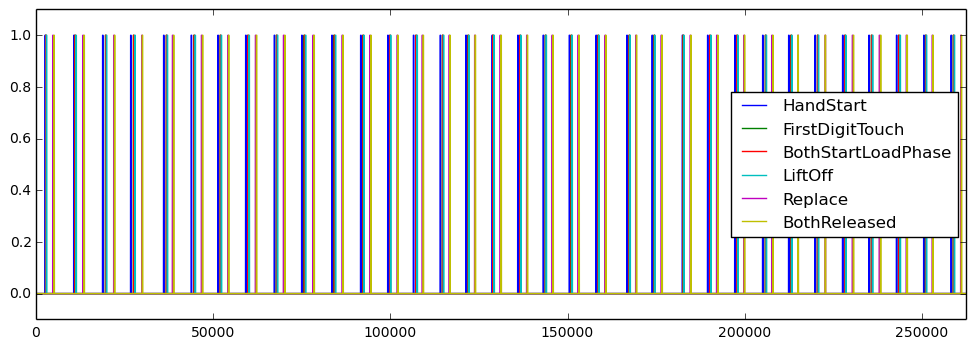

In [19]:
evt.plot(ylim = (-0.1, 1.1), figsize = (12, 4) )

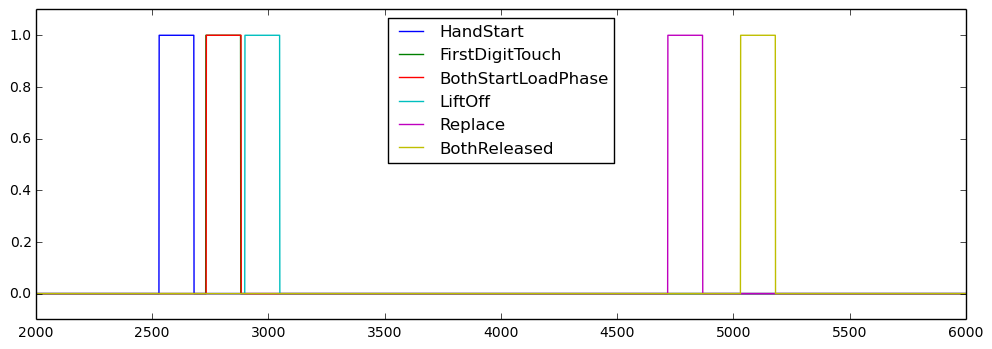

In [24]:
evt.plot(ylim = (-0.1, 1.1), figsize = (12, 4), xlim = (2000, 6000) )

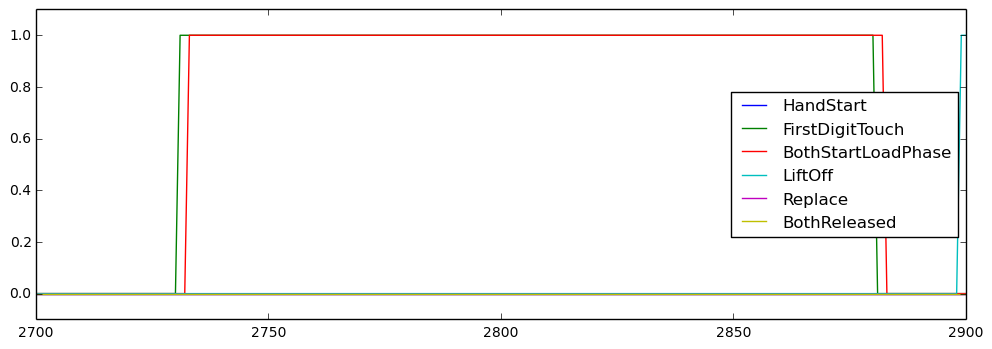

In [25]:
evt.plot(ylim = (-0.1, 1.1), figsize = (12, 4), xlim = (2700, 2900) )

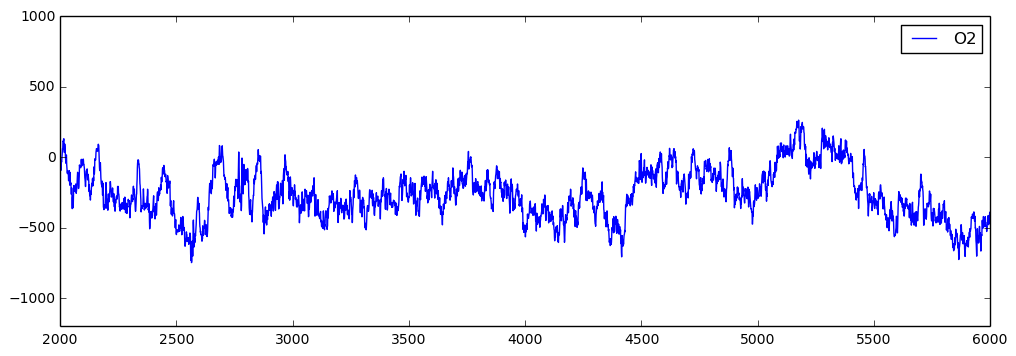

In [32]:
eeg.plot(figsize = (12, 4), xlim = (2000, 6000), ylim = (-1200, 1000), y = 'O2' )